In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
import math
from scipy.stats import binom, nbinom, moment, multinomial, norm
import random
import statistics
from statistics import mean
from pylab import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

0.6226697184701571


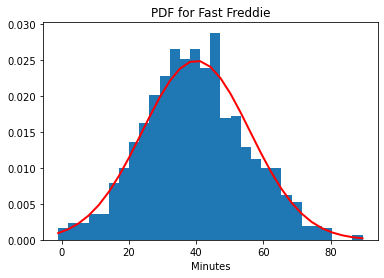

In [2]:
c

In [3]:
sns.set(style='white', palette="muted", color_codes=True)
loc1, scale1, loc2, scale2, w1, w2 = -10, 1, 9, 2, 0.5, 0.5
gaussian1 = stats.norm.rvs(loc=loc1, scale=scale1, size=10000)
gaussian2 = stats.norm.rvs(loc=loc2, scale=scale2, size=10000)

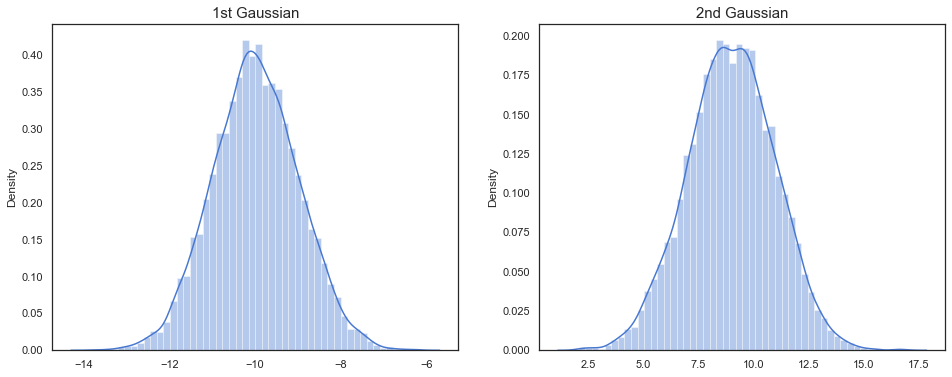

In [4]:
fix,ax = plt.subplots(1,2,figsize=(16,6))
sns.distplot(gaussian1, ax=ax[0])
ax[0].set_title('1st Gaussian', fontdict={"fontsize":15})
#ax[0].set_xlim(0,20)
sns.distplot(gaussian2, ax=ax[1])
ax[1].set_title('2nd Gaussian', fontdict={"fontsize":15})
#ax[1].set_xlim(0,20)
plt.show()

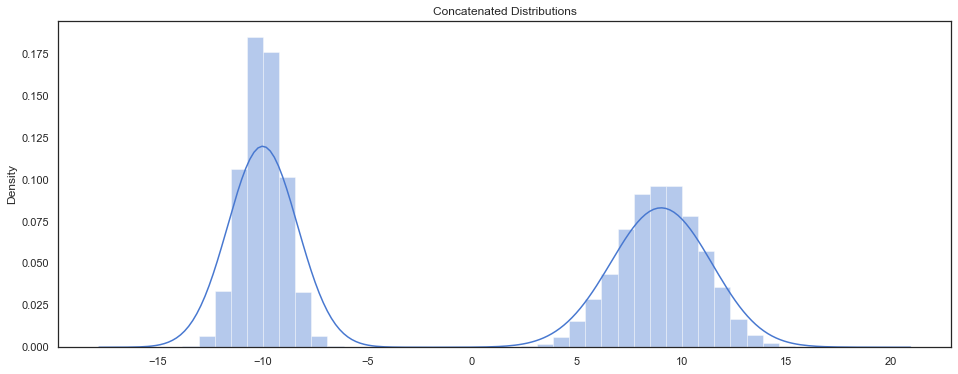

In [5]:
np.concatenate([gaussian1,gaussian2]).shape
fix,ax = plt.subplots(1,1, figsize=(16,6))
concat_arrays = np.concatenate([gaussian1,gaussian2])
sns.distplot(concat_arrays, bins=40)
ax.set_title("Concatenated Distributions")
plt.show();

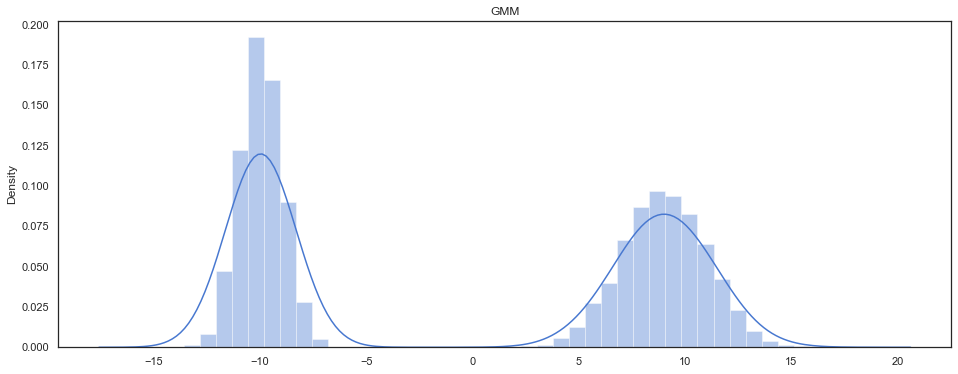

In [8]:
gmm_data = []
for i in range (20000):
    p = stats.uniform.rvs(size=1) #generates random p's
    if p < w1:
        gmm_data.append(np.random.choice(a=gaussian1, size=1))
    else: 
        gmm_data.append(np.random.choice(a=gaussian2, size=1))
#plot gmm
fig,ax = plt.subplots(1,1, figsize=(16,6))
sns.distplot(gmm_data, bins=40)
plt.title('GMM')
plt.show()

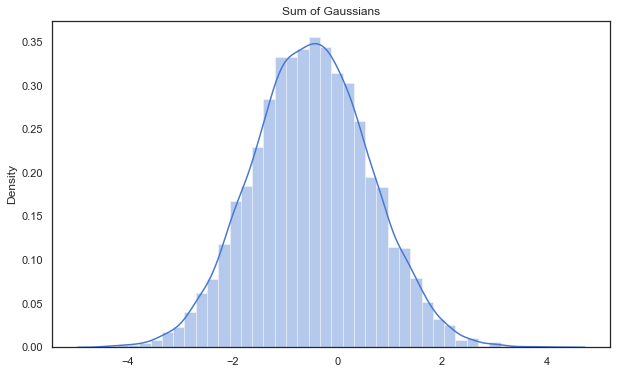

(10000,)


In [19]:
#create a sum of two Gaussians
data = w1*gaussian1 + w2*gaussian2
#plot sum of gaussians
fig = plt.figure(figsize=(10,6))
sns.distplot(data, bins=40)
plt.title('Sum of Gaussians')
plt.show()
print(data.shape)

In [30]:
def gmm_vs_2_gaussians(loc1, scale1, loc2, scale2, w1, w2):
    
    #generate 2 gaussians
    gaussian1 = stats.norm.rvs(loc=loc1, scale=scale1, size=10000)
    gaussian2 = stats.norm.rvs(loc=loc2, scale=scale2, size=10000)
    label1 = 'first~N({},{})'.format(loc1,scale1)
    label2 = 'second~N({},{})'.format(loc2,scale2)
   
    #plotting each one
    fig,ax = plt.subplots(1,2,figsize=(16,6))
    sns.distplot(gaussian1,ax=ax[0],label=label1)
    ax[0].set_title('First Guassian',fontdict={'fontsize':15})
    ax[0].set_xlim(0,20)
    ax[0].legend();
    sns.distplot(gaussian2,ax=ax[1],label=label2)
    ax[1].set_title('Second Guassian',fontdict={'fontsize':15})
    ax[1].set_xlim(0,20)
    ax[1].legend();
    plt.show()

    #create the gmm data
    gmm_data = []
    for i in range (20000):
        p = stats.uniform.rvs(size=1) #generates random p's
        if p<w1:
            gmm_data.append(np.random.choice(a=gaussian1, size=1))
        else: 
            gmm_data.append(np.random.choice(a=gaussian2, size=1))
        
    #plot GMM
    label_gmm = 'f(x)={}*N({},{})+{}*N({},{})'.format(w1,loc1,scale1,w2,loc2,scale2)
    fig = plt.figure(figsize=(10,6))
    sns.distplot(gmm_data, bins=40, label=label_gmm)
    plt.title('GMM')
    plt.legend();
    plt.show()
    
    #create a sum of two Gaussians
    data = w1*gaussian1 + w2*gaussian2
    #plot sum of gaussians
    label_sum = 'sum-N({},{})'.format(loc1+loc2,scale1+scale2)
    fig = plt.figure(figsize=(10,6))
    sns.distplot(data, bins=40, label=label_sum)
    plt.title('Sum of Gaussians')
    plt.legend();
    plt.show()

    #Mean calculations
    #Each Gaussian
    print ('Gaussians means:')
    print(np.mean(gaussian1))
    print(np.mean(gaussian2))
    print('-'*20)
    
    #sum of Gaussians
    print ("Sum of Gaussians' mean:")
    print("data: {:.2f}".format(np.mean(data)))
    print("formula: {:.2f}".format(w1*np.mean(gaussian1) + w2*np.mean(gaussian2)))
    print ("theoretical formula: {:.2f}".format(w1*loc1+w2*loc2))
    print("--------------")
           
    #GMMs
    print ("GMM mean:")
    print("data: {:.2f}".format(np.mean(gmm_data)))
    print("formula: {:.2f}".format(w1*np.mean(gaussian1) + w2*np.mean(gaussian2)))
    print ("theoretical formula: {:.2f}".format(w1*loc1+w2*loc2))
    print()
    print()
           
    #Variance calcs
    #each Gaussian
    print ('Gaussians variances:')       
    print(np.var(gaussian1))
    print(np.var(gaussian2))
    print("-"*20)
           
    #sum of Gaussians Variance
    print ("Sum of Gaussians' variance:")
    print("data: {:.2f}".format(np.var(data)))
    print("formula: {:.2f}".format(np.power(w1,2)*np.var(gaussian1) + np.power(w2,2)*np.var(gaussian2)))
    print ("theoretical formula: {:.2f}".format(np.power(w1,2)*np.power(scale1,2)+np.power(w2,2)*np.power(scale2,2)))
    print('-'*20)
           
    #GMM Variance
    print ('GMM Variance:')
    print("data: {:.2f}".format(np.var(gmm_data)))
    print("formula: {:.2f}".format(w1*np.var(gaussian1)+w2*np.var(gaussian2)+w1*(np.power((np.mean(gaussian1)-np.mean(gmm_data)),2)) + w2*(np.power((np.mean(gaussian2)-np.mean(gmm_data)),2))))
    print ("theoretical formula: {:.2f}".format(w1*np.power(scale1,2)+w2*np.power(scale2,2) + w1*(np.power((loc1 - (w1*loc1 + w2*loc2)), 2)) + w2*(np.power((loc2- (w1*loc1 + w2*loc2)), 2))))
           
    

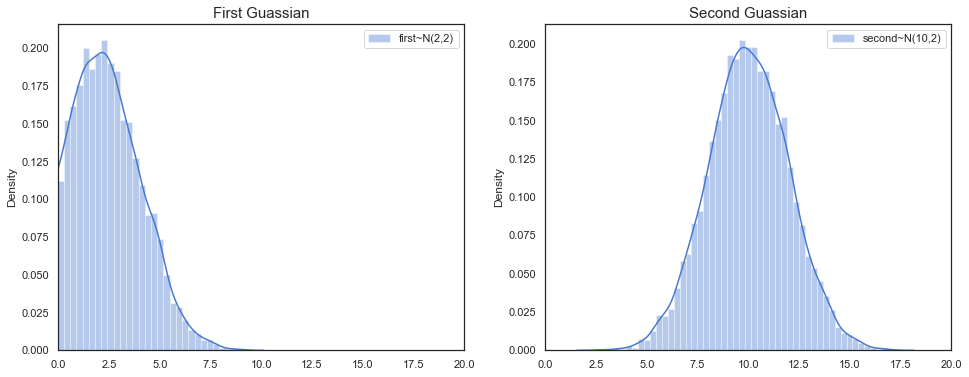

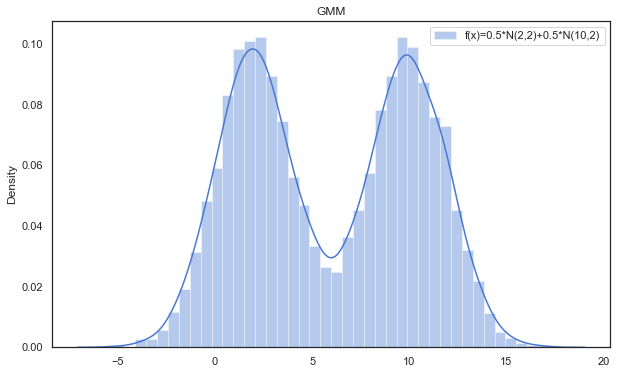

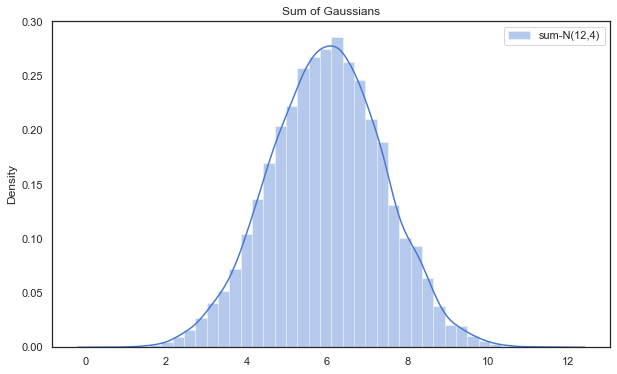

Gaussians means:
1.9921181133069077
10.016985483244387
--------------------
Sum of Gaussians' mean:
data: 6.00
formula: 6.00
theoretical formula: 6.00
--------------
GMM mean:
data: 5.98
formula: 6.00
theoretical formula: 6.00


Gaussians variances:
3.996004859362343
3.9542312484832984
--------------------
Sum of Gaussians' variance:
data: 1.98
formula: 1.99
theoretical formula: 2.00
--------------------
GMM Variance:
data: 20.00
formula: 20.08
theoretical formula: 20.00


In [31]:
gmm_vs_2_gaussians(2,2,10,2,0.5,0.5)

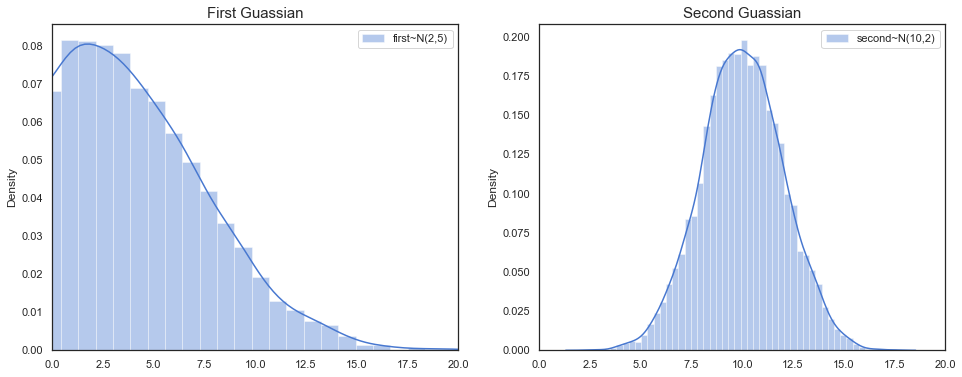

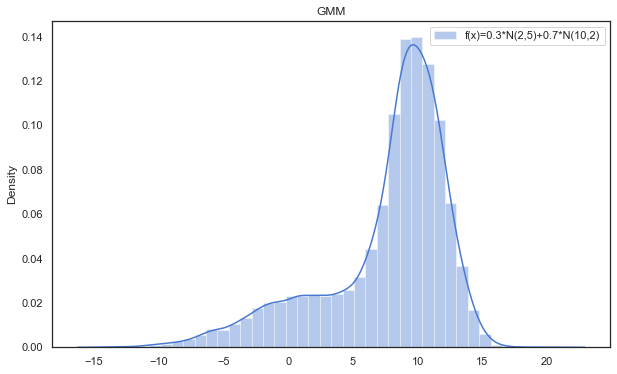

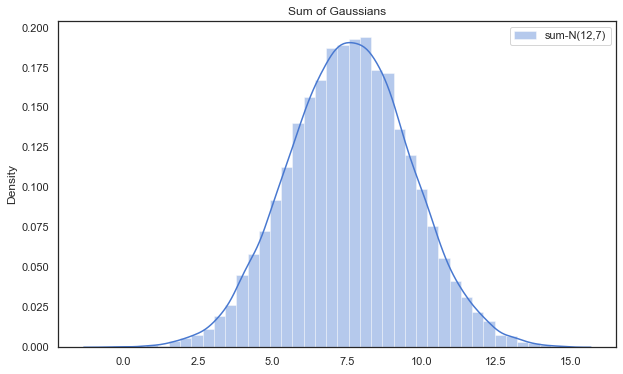

Gaussians means:
1.9547627744771987
10.011316458344078
--------------------
Sum of Gaussians' mean:
data: 7.59
formula: 7.59
theoretical formula: 7.60
--------------
GMM mean:
data: 7.61
formula: 7.59
theoretical formula: 7.60


Gaussians variances:
24.949347573063722
4.084032052790206
--------------------
Sum of Gaussians' variance:
data: 4.18
formula: 4.25
theoretical formula: 4.21
--------------------
GMM Variance:
data: 23.79
formula: 23.97
theoretical formula: 23.74


In [33]:
gmm_vs_2_gaussians(2,5,10,2,0.3,0.7)